# Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from joblib import dump

import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

# Reading and Organizing Data

In [2]:
data = pd.read_csv('can.csv')

In [3]:
data = data.drop([539, 540, 541])
data

,Date,Cases,Deaths,Tests,Cases/Population,Diff Cases/Population,Deaths/Cases,Tests/Cases
0,2020-01-22,1.0,0.0,0.0,0.000003,NaN,0.000000,0.000000
1,2020-01-23,1.0,0.0,0.0,0.000003,0.000000,0.000000,0.000000
2,2020-01-24,2.0,0.0,0.0,0.000005,0.000003,0.000000,0.000000
3,2020-01-25,2.0,0.0,0.0,0.000005,0.000000,0.000000,0.000000
4,2020-01-26,2.0,0.0,0.0,0.000005,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
534,2021-07-13,1429029.0,26414.0,37564476.0,3.801620,0.000904,1.848388,2628.671357
535,2021-07-14,1429369.0,26427.0,37613760.0,3.802525,0.000904,1.848858,2631.494037
536,2021-07-15,1429747.0,26436.0,37679387.0,3.803530,0.001006,1.848998,2635.388429
537,2021-07-16,1430127.0,26450.0,37747547.0,3.804541,0.001011,1.849486,2639.454188


In [4]:
data.insert(1, 'New Cases', data['Cases'].diff(), True)
data.insert(2, 'New Tests', data['Tests'].diff(), True)
data.insert(2, 'New Deaths', data['Deaths'].diff(), True)
data

,Date,New Cases,New Deaths,New Tests,Cases,Deaths,Tests,Cases/Population,Diff Cases/Population,Deaths/Cases,Tests/Cases
0,2020-01-22,NaN,NaN,NaN,1.0,0.0,0.0,0.000003,NaN,0.000000,0.000000
1,2020-01-23,0.0,0.0,0.0,1.0,0.0,0.0,0.000003,0.000000,0.000000,0.000000
2,2020-01-24,1.0,0.0,0.0,2.0,0.0,0.0,0.000005,0.000003,0.000000,0.000000
3,2020-01-25,0.0,0.0,0.0,2.0,0.0,0.0,0.000005,0.000000,0.000000,0.000000
4,2020-01-26,0.0,0.0,0.0,2.0,0.0,0.0,0.000005,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
534,2021-07-13,340.0,9.0,110421.0,1429029.0,26414.0,37564476.0,3.801620,0.000904,1.848388,2628.671357
535,2021-07-14,340.0,13.0,49284.0,1429369.0,26427.0,37613760.0,3.802525,0.000904,1.848858,2631.494037
536,2021-07-15,378.0,9.0,65627.0,1429747.0,26436.0,37679387.0,3.803530,0.001006,1.848998,2635.388429
537,2021-07-16,380.0,14.0,68160.0,1430127.0,26450.0,37747547.0,3.804541,0.001011,1.849486,2639.454188


In [5]:
df1 = data[['Cases', 'Deaths', 'Tests']]
df1

,Cases,Deaths,Tests
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,2.0,0.0,0.0
3,2.0,0.0,0.0
4,2.0,0.0,0.0
...,...,...,...
534,1429029.0,26414.0,37564476.0
535,1429369.0,26427.0,37613760.0
536,1429747.0,26436.0,37679387.0
537,1430127.0,26450.0,37747547.0


# Plotting Relationships

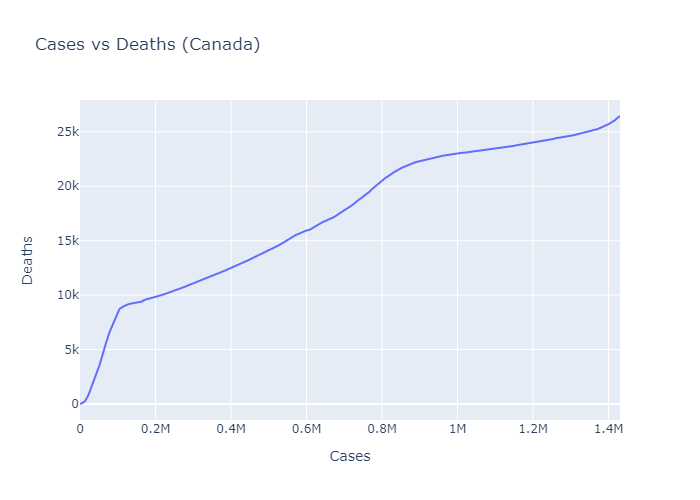

In [6]:
fig = px.line(data, x='Cases', y='Deaths', template = "plotly_dark", title = "Cases vs Deaths (Canada)")

fig.show()

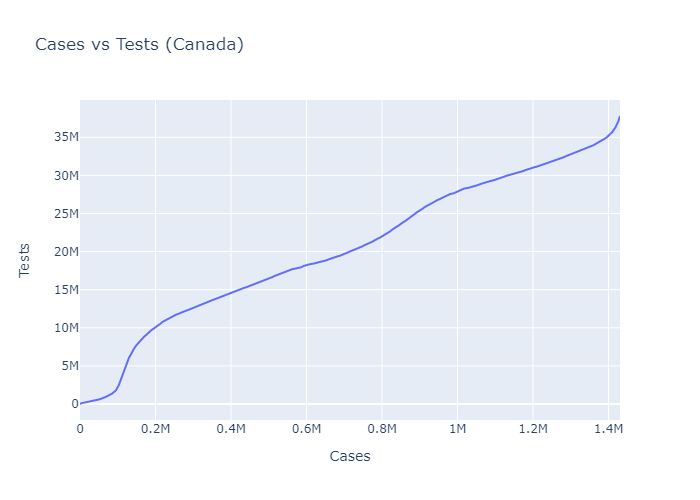

In [7]:
fig = px.line(data, x='Cases', y='Tests', template = "plotly_dark", title = "Cases vs Tests (Canada)")

fig.show()

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1['Cases'], df1['Deaths'], test_size=0.2, random_state=42)

X_train1 = np.array(X_train1).reshape(-1,1)
y_train1 = np.array(y_train1).reshape(-1,1)
X_test1 = np.array(X_test1).reshape(-1,1)
y_test1 = np.array(y_test1).reshape(-1,1)

In [9]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df1['Cases'], df1['Tests'], test_size=0.2, random_state=42)

X_train2 = np.array(X_train2).reshape(-1,1)
y_train2 = np.array(y_train2).reshape(-1,1)
X_test2 = np.array(X_test2).reshape(-1,1)
y_test2 = np.array(y_test2).reshape(-1,1)

# Model Training and Set up

In [10]:
linear_model1 = LinearRegression()
linear_model2 = LinearRegression()

In [11]:
linear_model1.fit(X_train1, y_train1)

LinearRegression()

In [12]:
linear_model2.fit(X_train2, y_train2)

LinearRegression()

# Evaluating Accuracy Metrics

In [13]:
acc = linear_model1.score(X_test1, y_test1)
print(f'Case to Death Model Accuracy: {acc*100}%')

Case to Death Model Accuracy: 90.6077493181573%


In [14]:
acc2 = linear_model2.score(X_test2, y_test2)
print(f'Case to Test Model Accuracy: {acc2*100}%')

Case to Test Model Accuracy: 98.26455339259716%


In [15]:
preds1 = linear_model1.predict(np.array(df1['Cases']).reshape(-1,1))

info1_pred = pd.DataFrame({'Type': ['Linear Model']*539, 'Cases': df1['Cases'], 'Deaths': preds1.reshape(-1)})
info1_true = pd.DataFrame({'Type': ['True Data']*539, 'Cases': df1['Cases'], 'Deaths': df1['Deaths']})

final1 = pd.concat([info1_true, info1_pred])

In [16]:
preds2 = linear_model2.predict(np.array(df1['Cases']).reshape(-1,1))

info2_pred = pd.DataFrame({'Type': ['Linear Model']*539, 'Cases': df1['Cases'], 'Tests': preds2.reshape(-1)})
info2_true = pd.DataFrame({'Type': ['True Data']*539, 'Cases': df1['Cases'], 'Tests': df1['Tests']})

final2 = pd.concat([info2_true, info2_pred])

In [17]:
final1

,Type,Cases,Deaths
0,True Data,1.0,0.000000
1,True Data,1.0,0.000000
2,True Data,2.0,0.000000
3,True Data,2.0,0.000000
4,True Data,2.0,0.000000
...,...,...,...
534,Linear Model,1429029.0,28569.839564
535,Linear Model,1429369.0,28575.435489
536,Linear Model,1429747.0,28581.656840
537,Linear Model,1430127.0,28587.911108


In [18]:
final2

,Type,Cases,Tests
0,True Data,1.0,0.000000e+00
1,True Data,1.0,0.000000e+00
2,True Data,2.0,0.000000e+00
3,True Data,2.0,0.000000e+00
4,True Data,2.0,0.000000e+00
...,...,...,...
534,Linear Model,1429029.0,3.765379e+07
535,Linear Model,1429369.0,3.766234e+07
536,Linear Model,1429747.0,3.767185e+07
537,Linear Model,1430127.0,3.768140e+07


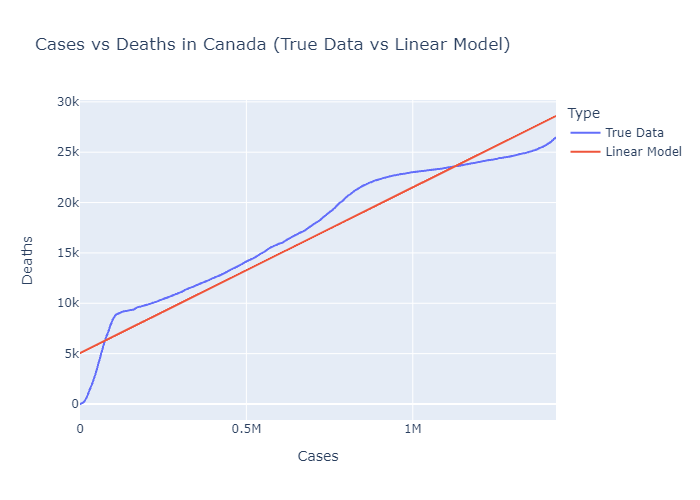

In [19]:
fig = px.line(final1, x='Cases', y='Deaths', color='Type', template = "plotly_dark",title = 'Cases vs Deaths in Canada (True Data vs Linear Model)')

fig.show()

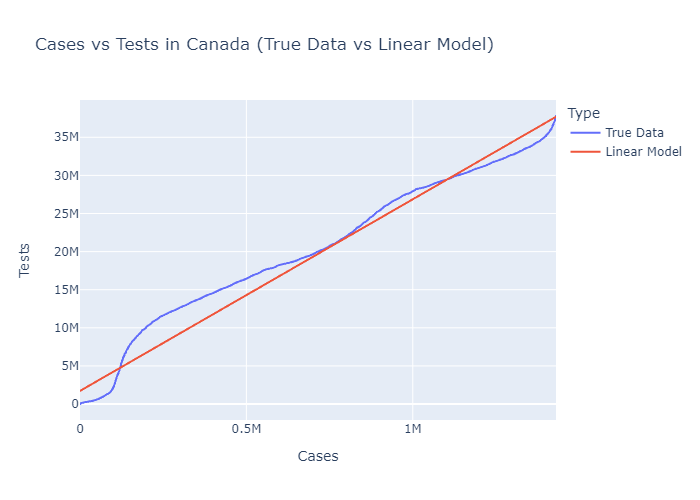

In [20]:
fig = px.line(final2, x='Cases', y='Tests', color='Type', template = "plotly_dark", title = 'Cases vs Tests in Canada (True Data vs Linear Model)')

fig.show()

In [21]:
x = int(round(linear_model1.predict([[2000000]])[0][0], 0))
y = int(round(linear_model2.predict([[2000000]])[0][0], 0))

print('Model prediction for 2 MILLION Total Cases in Canada\n')
print('Total Deaths:', x)
print('-'*53)

Model prediction for 2 MILLION Total Cases in Canada

Total Deaths: 37967
-----------------------------------------------------


In [22]:
print('Model prediction for 2 MILLION Total Cases in Canada\n')
print('Total Tests Performed:', y)
print('-'*53)

Model prediction for 2 MILLION Total Cases in Canada

Total Tests Performed: 52013381
-----------------------------------------------------
